# CS5785 Homework 1 Part II

[Yufan Zhang](https://yufanbruce.com) (yz2894)


## Preparation


In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore any warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
# PATH variables
DATA_PATH = "./data/Part_II/"
IMG_PATH = "./img/Part_II/"
RESULT_PATH = "./result/Part_II/"

if not os.path.exists(IMG_PATH):
    os.makedirs(IMG_PATH)

if not os.path.exists(RESULT_PATH):
    os.makedirs(RESULT_PATH)

In [4]:
# Two helper functions to keep or drop features
def keep_features(df, features_to_keep):
    return df[features_to_keep]


def drop_features(df, features_to_drop):
    return df.drop(features_to_drop, axis=1)

## Data Ingestion


In [5]:
# Load the training and test data
def load_data_from_csv(filename):
    """
    Load the data to a Pandas dataframe from a csv file

    Args:
        filename: string containing the path to the dataset

    Return:
        a Pandas dataframe containing the loaded data
    """
    return pd.read_csv(os.path.join(DATA_PATH, filename), index_col=0)

In [6]:
# Load the train data
df = load_data_from_csv("train.csv")
print(f"Shape of the training data: {df.shape}")

# # Set the target variable
# target = df["Survived"]
# df = drop_features(df, "Survived")
# print(f"Shape of the training Y: {target.shape}")

df

Shape of the training data: (891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [115]:
# Drop the some irrelevant features
features_to_drop_irrelevant = ["Name", "Ticket"]
df = drop_features(df, features_to_drop_irrelevant)
print(f"Shape of the training data: {df.shape}")
df

Shape of the training data: (891, 9)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,NaN,S
888,1,1,female,19.0,0,0,30.0000,B42,S
889,0,3,female,NaN,1,2,23.4500,NaN,S


## Missing Values Handling

Drop the features with more than 50% missing values.

In [116]:
# Check missing values in train data
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [117]:
# Determine which features to be dropped based on the percentage of NA values in the training data
def get_feature_to_drop_by_hight_na(df_train, feature_list, threshold):
    """
    Determine which features to be dropped based on the percentage of NA values
    in the training data

    Args:
        df_train: a Pandas dataframe containing the training data
        feature_list: a list of features to be checked
        threshold: a float number indicating the threshold of NA percentage

    Return:
        A list containing the features to be dropped
    """
    null_counts = df_train.loc[:, feature_list].isna().sum() / len(df_train)
    return list(null_counts[null_counts > threshold].index)


# Drop the features with NA values more than 30%
features_to_drop_by_hight_na = get_feature_to_drop_by_hight_na(
    df, df.columns, threshold=0.3)

print("The features need to be dropped due to high volumes of NA values:")
print(features_to_drop_by_hight_na)

The features need to be dropped due to high volumes of NA values:
['Cabin']


In [118]:
# Drop the features with NA values more than 30%
df = drop_features(df, features_to_drop_by_hight_na)
print(f"Shape of the training data: {df.shape}")
df

Shape of the training data: (891, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


For the numerical features, we will first examine their distribution.

In [119]:
# Extract the numerical features
column_types = df.dtypes

num_features = column_types[column_types != "object"].index.tolist()
print(f"Numerical features: ({len(num_features)})")
print(num_features)
print()

# Extract the categorical features
cat_features = column_types[column_types == "object"].index.tolist()
print(f"Categorical features: ({len(cat_features)})")
print(cat_features)

Numerical features: (6)
['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Categorical features: (2)
['Sex', 'Embarked']


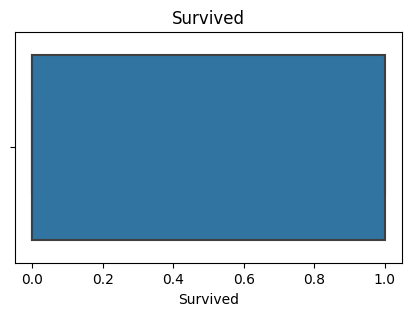

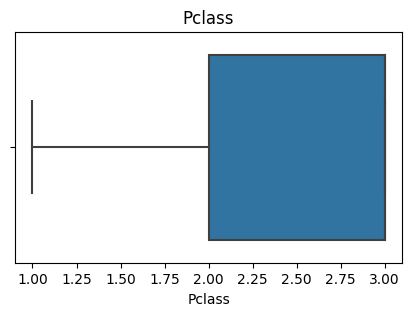

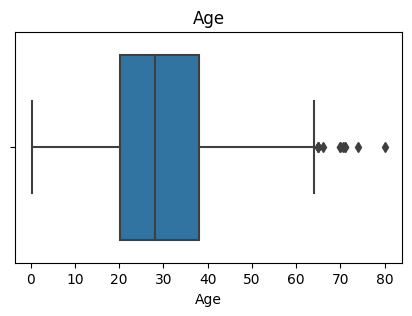

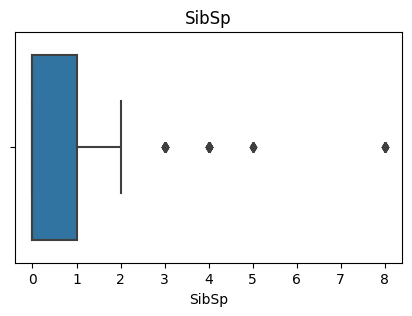

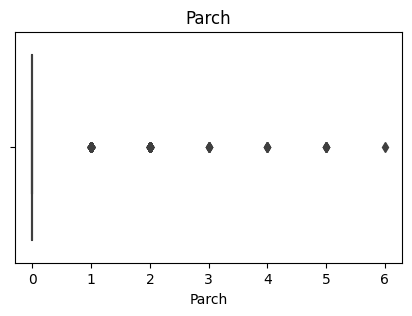

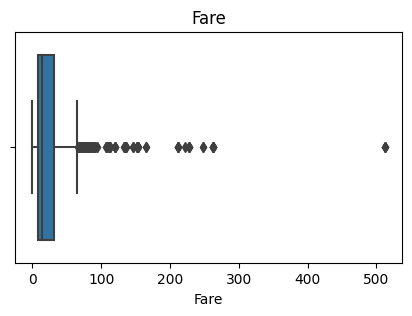

In [120]:
# Create the boxplots for each numerical features
for feature in num_features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[feature])
    plt.title(feature)
    plt.savefig(os.path.join(IMG_PATH, f"{feature}_boxplot.png"))
    plt.show()


As illustrated in the boxplot, the Age and Fare features are right skewed. Therefore, it would be less biased to use the median to fill the missing values than the mean.

In [121]:
# Get the mathematical measures of each feature
def get_fea_measures_dict(df_train, feature_list, measure="mode"):
    """
    Create a dict to map the mode/mean/median of each feature in the training dataset,
    which can be used to transform the test dataset

    Args:
        df_train: a Pandas dataframe containing the training data
        feature_list: a list of features to measure on
        measure: mode/mean/median

    Return:
        A dict containing the measure of each feature
    """
    measure_dict = dict()
    for col in feature_list:
        if measure == "mode":
            measure_dict[col] = df_train[col].mode()[0]
        elif measure == "mean":
            measure_dict[col] = df_train[col].mean()
        elif measure == "median":
            measure_dict[col] = df_train[col].median()
        else:
            raise ValueError("measure should be mode/mean/median")
    return measure_dict


age_median_dict = get_fea_measures_dict(df, ["Age", "Fare"], "median")

age_median_dict

{'Age': 28.0, 'Fare': 14.4542}

In [122]:
# Fill the NA values in "Age" with the median of the features in the training dataset
def fill_na_with_measures(df, measure_dict):
    """
    Fill the NA values in features with the measures of the features in the training dataset

    Args:
        df: a Pandas dataframe containing the data to be transformed
        measure_dict: a dict containing the measure of each feature

    Return:
        A Pandas dataframe after NA values being filled
    """
    for col in measure_dict.keys():
        df[col].fillna(measure_dict[col], inplace=True)
    return df


df = fill_na_with_measures(df, age_median_dict)

# Check if there are still NA values in the numerical features
print("Number of NA values in the training data's numerical features:")
print(df.isna().sum().sum())
print(f"Shape of the training data: {df.shape}")
df

Number of NA values in the training data's numerical features:
2
Shape of the training data: (891, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


For Embarked feature, the NA value will be filled with the mode as it is a categorical feature.

In [123]:
embarked_median_dict = get_fea_measures_dict(df, ["Embarked"], "mode")

df = fill_na_with_measures(df, embarked_median_dict)

# Check if there are still NA values in the numerical features
print("Number of NA values in the training data's numerical features:")
print(df.isna().sum().sum())
print(f"Shape of the training data: {df.shape}")
df

Number of NA values in the training data's numerical features:
0
Shape of the training data: (891, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


## Feature Engineering

First, both of "SibSp" and "Parch" defines how many family that a passenger was traveling with. We can combine them to make a new feature "FamilyCount" to represent the number of family members that the passenger was traveling with.

In [124]:
def combine_sibsp_parch(df):
    """
    Add the "Sibsp" and "Parch" values to create a new feature named "FamilyCount"
    
    Args:
        df: the dataset to be transformed
        
    Return:
        A dataset after transformation
    """
    df["FamilyCount"] = df.apply(lambda x: x["SibSp"] + x["Parch"], axis=1)
    df = drop_features(df, ["SibSp", "Parch"])
    return df

df = combine_sibsp_parch(df)

print(f"Shape of the training data: {df.shape}")
df

Shape of the training data: (891, 7)


,Survived,Pclass,Sex,Age,Fare,Embarked,FamilyCount
PassengerId,,,,,,,
1,0,3,male,22.0,7.2500,S,1
2,1,1,female,38.0,71.2833,C,1
3,1,3,female,26.0,7.9250,S,0
4,1,1,female,35.0,53.1000,S,1
5,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
887,0,2,male,27.0,13.0000,S,0
888,1,1,female,19.0,30.0000,S,0
889,0,3,female,28.0,23.4500,S,3


<Axes: xlabel='FamilyCount', ylabel='Survived'>

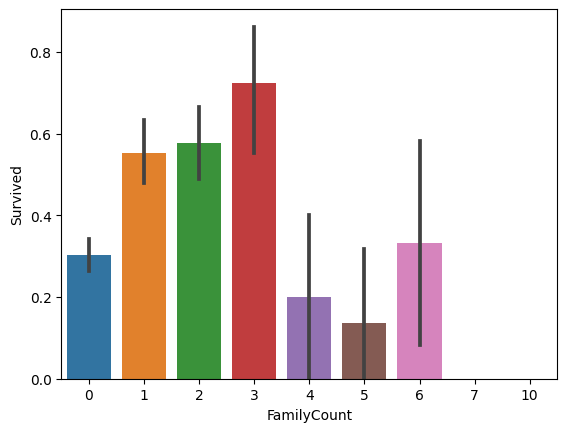

In [125]:
sns.barplot(data=df, x="FamilyCount", y="Survived")

Then, examine the distribution of each categorical feature. Drop the features with high skewness.

In [126]:
# Extract the numerical features
column_types = df.dtypes

num_features = column_types[column_types != "object"].index.tolist()
print(f"Numerical features: ({len(num_features)})")
print(num_features)
print()

# Extract the categorical features
cat_features = column_types[column_types == "object"].index.tolist()
print(f"Categorical features: ({len(cat_features)})")
print(cat_features)

Numerical features: (5)
['Survived', 'Pclass', 'Age', 'Fare', 'FamilyCount']

Categorical features: (2)
['Sex', 'Embarked']


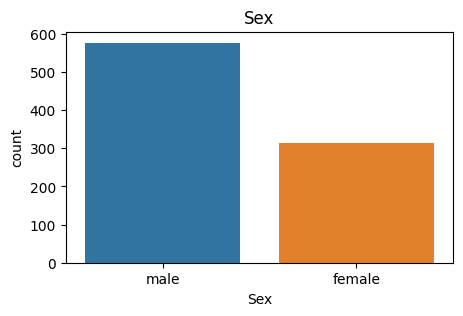

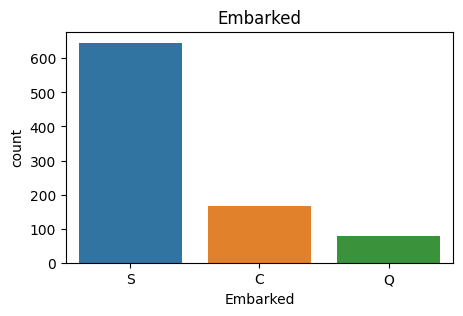

In [127]:
# Create the barchart for the amount of each categorical feature
for feature in cat_features:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=df[feature])
    plt.title(feature)
    # plt.savefig(os.path.join(IMG_PATH, f"{feature}_countplot.png"))
    plt.show()

In [128]:
# Drop the features with high skewness
def get_skewed_features(df, feature_list, threshold=0.8):
    """
    Get the skewed features

    Args:
        df: a Pandas dataframe containing the data to be transformed
        feature_list: a list of features to be checked
        threshold: a float number indicating the threshold of skewness

    Return:
        A list containing the skewed features
    """
    skewed_features = list()
    for col in feature_list:
        if df[col].value_counts(normalize=True).values[0] > threshold:
            print(f"{col}: {df[col].value_counts(normalize=True).values[0]}")
            skewed_features.append(col)
    return skewed_features


feature_to_drop_skewed = get_skewed_features(df, cat_features)

print("The features need to be dropped due to high skewness:")
print(feature_to_drop_skewed)

# Drop the skewed categorical features
df = drop_features(df, feature_to_drop_skewed)

# Update the categorical features list
cat_features = list(set(cat_features) - set(feature_to_drop_skewed))

print(f"Shape of the training data: {df.shape}")
df

The features need to be dropped due to high skewness:
[]
Shape of the training data: (891, 7)


,Survived,Pclass,Sex,Age,Fare,Embarked,FamilyCount
PassengerId,,,,,,,
1,0,3,male,22.0,7.2500,S,1
2,1,1,female,38.0,71.2833,C,1
3,1,3,female,26.0,7.9250,S,0
4,1,1,female,35.0,53.1000,S,1
5,0,3,male,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
887,0,2,male,27.0,13.0000,S,0
888,1,1,female,19.0,30.0000,S,0
889,0,3,female,28.0,23.4500,S,3


Then, perform one-hot encoding to the categorical features.

In [129]:
# Create a dict containing all the feature names of each categorical feature
def get_categories_list(df_train, categorical_features):
    """
    Create a dict containing all the feature names of each categorical feature from the training data

    Arg:
        df_train: a Pandas dataframe for training data
        categorical_features: a list of categorical feature names

    Return:
        A dict whose key is each categorical feature and value is the category name
    """
    categories = dict()
    for col in categorical_features:
        categories[col] = df_train[col].unique().tolist()

    return categories


categories_dict = get_categories_list(df, cat_features)
categories_dict

{'Sex': ['male', 'female'], 'Embarked': ['S', 'C', 'Q']}

In [130]:
# Perform one-hot encoding to the training dataset
def apply_one_hot_encode(df, categories_dict):
    """
    Perform one-hot encoding to the dataset given the categories dict generated from the training dataset

    Args:
        df: a Pandas dataframe containing the data
        categories_dict: a dict whose key is each categorical feature and value is the category name

    Return:
        A pandas dataframe after one-hot encoding on the categorical data
    """
    for col, categories in categories_dict.items():
        for category in categories:
            df[f"{col}_{category}"] = (df[col] == category).astype(int)
        df.drop(col, axis=1, inplace=True)
    return df


df = apply_one_hot_encode(df, categories_dict)

print(f"Shape of the training data: {df.shape}")
df

Shape of the training data: (891, 10)


,Survived,Pclass,Age,Fare,FamilyCount,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q
PassengerId,,,,,,,,,,
1,0,3,22.0,7.2500,1,1,0,1,0,0
2,1,1,38.0,71.2833,1,0,1,0,1,0
3,1,3,26.0,7.9250,0,0,1,1,0,0
4,1,1,35.0,53.1000,1,0,1,1,0,0
5,0,3,35.0,8.0500,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,13.0000,0,1,0,1,0,0
888,1,1,19.0,30.0000,0,0,1,1,0,0
889,0,3,28.0,23.4500,3,0,1,1,0,0


Then, for Age feature, examine its relationship with the target variable.

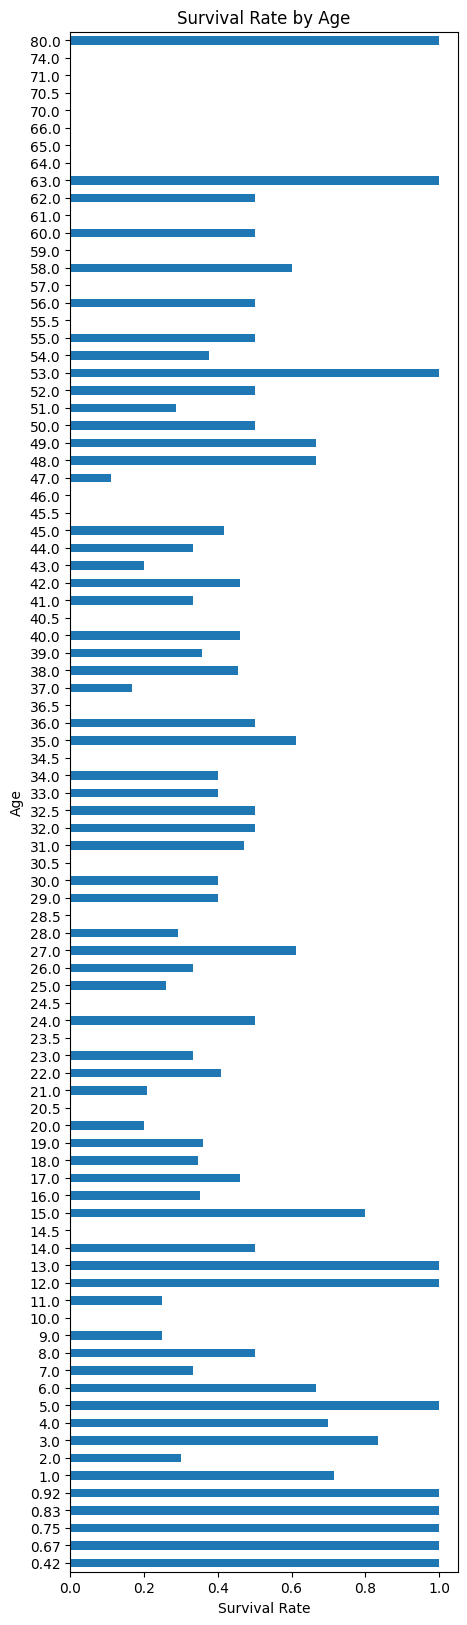

In [131]:
# Group by 'Age' and calculate the mean of 'Survived'
survival_rate = df.groupby("Age")["Survived"].mean()

# Plot the data
ax = survival_rate.plot(kind="barh", figsize=(5, 20))
# Set the title and labels
ax.set_title("Survival Rate by Age")
ax.set_xlabel("Survival Rate")
ax.set_ylabel("Age")

plt.savefig(os.path.join(IMG_PATH, "survival_rate_by_age.png"))
plt.show()

As illustrated in the figure, the survival rate of children is higher than that of adults. Therefore, we can create a new feature "IsChild" to represent whether the passenger is a child or not.

In [132]:
# Create a new feature "IsChild" to represent whether the passenger is a child or not.
def create_is_child(df, age_threshold=18):
    """
    Create a new feature "IsChild" to represent whether the passenger is a child or not.

    Args:
        df: a Pandas dataframe containing the data
        age_threshold: an integer indicating the threshold of age

    Return:
        A pandas dataframe after transformation
    """
    df["IsChild"] = (df["Age"] <= age_threshold).astype(int)
    return df


df = create_is_child(df)

print(f"Shape of the training data: {df.shape}")
df

Shape of the training data: (891, 11)


,Survived,Pclass,Age,Fare,FamilyCount,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q,IsChild
PassengerId,,,,,,,,,,,
1,0,3,22.0,7.2500,1,1,0,1,0,0,0
2,1,1,38.0,71.2833,1,0,1,0,1,0,0
3,1,3,26.0,7.9250,0,0,1,1,0,0,0
4,1,1,35.0,53.1000,1,0,1,1,0,0,0
5,0,3,35.0,8.0500,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,13.0000,0,1,0,1,0,0,0
888,1,1,19.0,30.0000,0,0,1,1,0,0,0
889,0,3,28.0,23.4500,3,0,1,1,0,0,0


Next, we will examine the correlation between the features and the target variable.

In [136]:
# Next, we will examine the correlation between the features and the target variable.
# Create a function to get the correlation between each feature and the target variable
def get_correlation(df, feature_list, target):
    """
    Get the correlation between each feature and the target variable

    Args:
        df: a Pandas dataframe containing the data
        feature_list: a list of features to be checked
        target: the target variable

    Return:
        A dict containing the correlation between each feature and the target variable
    """
    correlation_dict = dict()
    for col in feature_list:
        correlation_dict[col] = df[col].corr(df[target])
    return correlation_dict


correlation_dict = get_correlation(df, df.columns, "Survived")
print("The correlation between each feature and the target variable:")
print(correlation_dict)

# # We will drop the features with low correlation with the target variable.
# # Create a function to get the features with low correlation with the target variable
# def get_low_correlation_features(correlation_dict, threshold=0.1):
#     """
#     Get the features with low correlation with the target variable

#     Args:
#         correlation_dict: a dict containing the correlation between each feature and the target variable
#         threshold: a float number indicating the threshold of correlation

#     Return:
#         A list containing the features with low correlation with the target variable
#     """
#     low_correlation_features = list()
#     for col, correlation in correlation_dict.items():
#         if abs(correlation) < threshold:
#             low_correlation_features.append(col)
#     return low_correlation_features

# low_correlation_features = get_low_correlation_features(correlation_dict, threshold=0.1)
# print("The features need to be dropped due to low correlation with the target variable:")
# print(low_correlation_features)

The correlation between each feature and the target variable:
{'Survived': 1.0, 'Pclass': -0.3384810359610148, 'Age': -0.06491041993052583, 'Fare': 0.2573065223849622, 'FamilyCount': 0.01663898928274525, 'Sex_male': -0.5433513806577546, 'Sex_female': 0.5433513806577546, 'Embarked_S': -0.14968272327068574, 'Embarked_C': 0.16824043121823296, 'Embarked_Q': 0.0036503826839719864, 'IsChild': 0.10587274446188498}


## Model Training

In [137]:
# Implement the logistic regression model from scratch
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


class LogisticRegression:
    """
    A class to represent a logistic regression model

    Attributes:
        learning_rate: a float number indicating the learning rate
        max_iter: an integer indicating the maximum number of iterations
        weights: a numpy array containing the weights of the model
        bias: a float number indicating the bias of the model
        cost_history: a list containing the cost of each iteration
    """

    def __init__(self, learning_rate=0.01, max_iter=1000):
        """
        Constructs all the necessary attributes for the logistic regression model

        Args:
            learning_rate: a float number indicating the learning rate
            max_iter: an integer indicating the maximum number of iterations
        """
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None
        self.cost_history = None

    def fit(self, X, y):
        """
        Fit the logistic regression model to the training data

        Args:
            X: a numpy array containing the training data
            y: a numpy array containing the target variable

        Return:
            None
        """
        # Initialize the weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.cost_history = []

        # Implement the gradient descent algorithm
        for i in range(self.max_iter):
            # Calculate the linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Calculate the predicted probabilities
            y_pred = sigmoid(linear_model)

            # Calculate the cost
            cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            self.cost_history.append(cost)

            # Calculate the gradients
            dw = np.dot(X.T, (y_pred - y)) / len(X)
            db = np.mean(y_pred - y)

            # Update the weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        """
        Predict the target variable of the testing data

        Args:
            X: a numpy array containing the testing data

        Return:
            A numpy array containing the predicted target variable
        """
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_model)

        # Convert the probabilities to binary values
        y_pred = np.where(y_pred > 0.5, 1, 0)
        return y_pred

    def predict_proba(self, X):
        """
        Predict the probabilities of the testing data

        Args:
            X: a numpy array containing the testing data

        Return:
            A numpy array containing the predicted probabilities
        """
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_model)
        return y_pred

    def get_weights(self):
        """
        Get the weights of the model

        Args:
            None

        Return:
            A numpy array containing the weights of the model
        """
        return self.weights

    def get_bias(self):
        """
        Get the bias of the model

        Args:
            None

        Return:
            A float number indicating the bias of the model
        """
        return self.bias

    def get_cost_history(self):
        """
        Get the cost history of the model

        Args:
            None

        Return:
            A list containing the cost of each iteration
        """
        return self.cost_history

    def get_learning_rate(self):
        """
        Get the learning rate of the model

        Args:
            None

        Return:
            A float number indicating the learning rate of the model
        """
        return self.learning_rate

    def get_max_iter(self):
        """
        Get the maximum number of iterations of the model

        Args:
            None

        Return:
            An integer indicating the maximum number of iterations of the model
        """
        return self.max_iter

    def get_params(self):
        """
        Get the parameters of the model

        Args:
            None

        Return:
            A dict containing the parameters of the model
        """
        params = dict()
        params["learning_rate"] = self.learning_rate
        params["max_iter"] = self.max_iter
        params["weights"] = self.weights
        params["bias"] = self.bias
        params["cost_history"] = self.cost_history
        return params

    def set_params(self, params):
        """
        Set the parameters of the model

        Args:
            params: a dict containing the parameters of the model

        Return:
            None
        """
        self.learning_rate = params["learning_rate"]
        self.max_iter = params["max_iter"]
        self.weights = params["weights"]
        self.bias = params["bias"]
        self.cost_history = params["cost_history"]


# Create a function to get the accuracy of the model
def get_accuracy(y_true, y_pred):
    """
    Get the accuracy of the model

    Args:
        y_true: a numpy array containing the true target variable
        y_pred: a numpy array containing the predicted target variable

    Return:
        A float number indicating the accuracy of the model
    """
    return np.sum(y_true == y_pred) / len(y_true)


# Create a function to get the precision of the model
def get_precision(y_true, y_pred):
    """
    Get the precision of the model

    Args:
        y_true: a numpy array containing the true target variable
        y_pred: a numpy array containing the predicted target variable

    Return:
        A float number indicating the precision of the model
    """
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp)


# Create a function to get the recall of the model
def get_recall(y_true, y_pred):
    """
    Get the recall of the model

    Args:
        y_true: a numpy array containing the true target variable
        y_pred: a numpy array containing the predicted target variable

    Return:
        A float number indicating the recall of the model
    """
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn)


# Create a function to get the F1 score of the model
def get_f1_score(y_true, y_pred):
    """
    Get the F1 score of the model

    Args:
        y_true: a numpy array containing the true target variable
        y_pred: a numpy array containing the predicted target variable

    Return:
        A float number indicating the F1 score of the model
    """
    precision = get_precision(y_true, y_pred)
    recall = get_recall(y_true, y_pred)
    return 2 * precision * recall / (precision + recall)


# Create a function to get the confusion matrix of the model
def get_confusion_matrix(y_true, y_pred):
    """
    Get the confusion matrix of the model

    Args:
        y_true: a numpy array containing the true target variable
        y_pred: a numpy array containing the predicted target variable

    Return:
        A 2D numpy array containing the confusion matrix of the model
    """
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    return np.array([[tp, fp], [fn, tn]])


# Create a function to plot the confusion matrix
def plot_confusion_matrix(confusion_matrix):
    """
    Plot the confusion matrix

    Args:
        confusion_matrix: a 2D numpy array containing the confusion matrix of the model

    Return:
        None
    """
    plt.figure(figsize=(5, 3))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.savefig(os.path.join(IMG_PATH, "confusion_matrix.png"))
    plt.show()


# Create a function to get the ROC curve of the model
def get_roc_curve(y_true, y_pred_proba):
    """
    Get the ROC curve of the model

    Args:
        y_true: a numpy array containing the true target variable
        y_pred_proba: a numpy array containing the predicted probabilities

    Return:
        A tuple containing the false positive rate, true positive rate and threshold
    """
    fpr, tpr, threshold = [], [], []
    for i in np.linspace(0, 1, 100):
        y_pred = np.where(y_pred_proba >= i, 1, 0)
        fpr.append(1 - get_recall(y_true, y_pred))
        tpr.append(get_recall(y_true, y_pred))
        threshold.append(i)
    return fpr, tpr, threshold


# Create a function to plot the ROC curve
def plot_roc_curve(fpr, tpr, threshold):
    """
    Plot the ROC curve

    Args:
        fpr: a list containing the false positive rate
        tpr: a list containing the true positive rate
        threshold: a list containing the threshold

    Return:
        None
    """
    plt.figure(figsize=(5, 3))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], "--")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.savefig(os.path.join(IMG_PATH, "roc_curve.png"))
    plt.show()


# Create a function to plot the cost history
def plot_cost_history(cost_history):
    """
    Plot the cost history

    Args:
        cost_history: a list containing the cost of each iteration

    Return:
        None
    """
    plt.figure(figsize=(5, 3))
    plt.plot(cost_history)
    plt.title("Cost History")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.savefig(os.path.join(IMG_PATH, "cost_history.png"))
    plt.show()
    
# Create a function to plot the learning curve
def plot_learning_curve(train_acc_list, test_acc_list):
    """
    Plot the learning curve

    Args:
        train_acc_list: a list containing the training accuracy of each iteration
        test_acc_list: a list containing the testing accuracy of each iteration

    Return:
        None
    """
    plt.figure(figsize=(5, 3))
    plt.plot(train_acc_list, label="Training")
    plt.plot(test_acc_list, label="Testing")
    plt.title("Learning Curve")
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.savefig(os.path.join(IMG_PATH, "learning_curve.png"))
    plt.show()

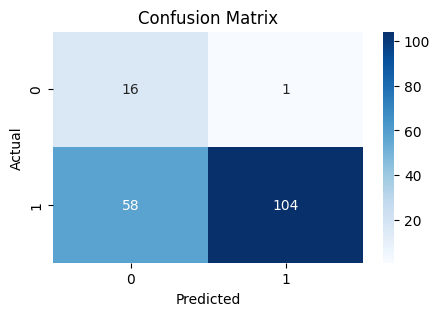

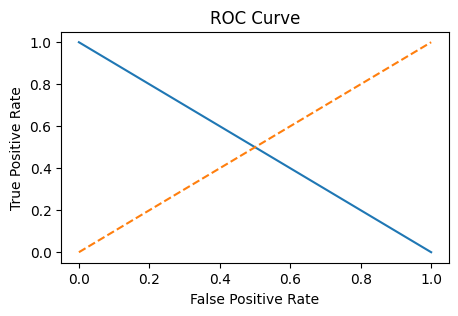

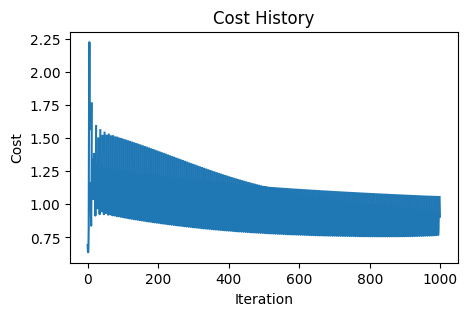

The performance of the model:
Accuracy: 0.6703910614525139
Precision: 0.9411764705882353
Recall: 0.21621621621621623
F1 Score: 0.3516483516483517


In [138]:
# First, we will split the training data into training and testing data.
# Create a function to split the training data into training and testing data
def train_test_split(df, target, test_size=0.2, random_state=42):
    """
    Split the training data into training and testing data

    Args:
        df: a Pandas dataframe containing the training data
        target: the target variable
        test_size: a float number indicating the proportion of testing data
        random_state: an integer indicating the random state

    Return:
        Four numpy arrays containing the training data, training target, testing data and testing target
    """
    # Split the training data into training and testing data
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        df, target, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

target = df["Survived"]
df = drop_features(df, "Survived")

# Split the training data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

# Fit the logistic regression model to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the predicted target variable of the testing data
y_pred = model.predict(X_test)

# Get the predicted probabilities of the testing data
y_pred_proba = model.predict_proba(X_test)

# Get the accuracy of the model
accuracy = get_accuracy(y_test, y_pred)

# Get the precision of the model
precision = get_precision(y_test, y_pred)

# Get the recall of the model
recall = get_recall(y_test, y_pred)

# Get the F1 score of the model
f1_score = get_f1_score(y_test, y_pred)

# Get the confusion matrix of the model
confusion_matrix = get_confusion_matrix(y_test, y_pred)

# Get the ROC curve of the model
fpr, tpr, threshold = get_roc_curve(y_test, y_pred_proba)

# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix)

# Plot the ROC curve
plot_roc_curve(fpr, tpr, threshold)

# Plot the cost history
plot_cost_history(model.get_cost_history())

# Print the performance of the model
print("The performance of the model:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

In [140]:
# Next, we will perform the same feature engineering and model training on the test data.
def infer(filename):
    """
    Perform the feature engineering and model training on the test data

    Args:
        filename: string containing the path to the test dataset

    Return:
        A Pandas dataframe containing the predicted target variable
    """
    # Load the test data
    df_test = load_data_from_csv(filename)
    print(f"Shape of the test data: {df_test.shape}")

    # Drop the some irrelevant features
    features_to_drop_irrelevant = ["Name", "Ticket"]
    df_test = drop_features(df_test, features_to_drop_irrelevant)
    print(f"Shape of the test data: {df_test.shape}")

    # Drop the features with NA values more than 30%
    df_test = drop_features(df_test, features_to_drop_by_hight_na)
    print(f"Shape of the test data: {df_test.shape}")

    # Fill the NA values in "Age" with the median of the features in the training dataset
    df_test = fill_na_with_measures(df_test, age_median_dict)

    # Fill the NA values in "Embarked" with the mode of the features in the training dataset
    df_test = fill_na_with_measures(df_test, embarked_median_dict)

    # Add the "Sibsp" and "Parch" values to create a new feature named "FamilyCount"
    df_test = combine_sibsp_parch(df_test)

    # Drop the skewed categorical features
    df_test = drop_features(df_test, feature_to_drop_skewed)

    # Apply one-hot encoding to the test dataset
    df_test = apply_one_hot_encode(df_test, categories_dict)

    # Create a new feature "IsChild" to represent whether the passenger is a child or not.
    df_test = create_is_child(df_test)

    # Drop the features with low correlation with the target variable
    # df_test = drop_features(df_test, low_correlation_features)
    print(f"Shape of the test data: {df_test.shape}")

    # Get the predicted target variable of the testing data
    y_pred = model.predict(df_test)
    
    # Save the predicted target variable to a csv file
    df_test["Survived"] = y_pred
    df_test[["Survived"]].to_csv(os.path.join(RESULT_PATH, "submission.csv"))

    return y_pred

# Infer the target variable of the test data
y_pred = infer("test.csv")


Shape of the test data: (418, 10)
Shape of the test data: (418, 8)
Shape of the test data: (418, 7)
Shape of the test data: (418, 10)
